# Analysing Laptop Data 


### In this file we will clean , analyze , visualize data generate meaningful insights to get appropriate solution to the problem


In [1]:
# importing data and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df=pd.read_csv(file_path,index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [4]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [6]:
df['Manufacturer'].value_counts()
# The data holds more number of dell laptops

Manufacturer
Dell       71
Lenovo     52
HP         49
Acer       19
Asus       18
Toshiba    17
Samsung     5
MSI         4
Huawei      1
Razer       1
Xiaomi      1
Name: count, dtype: int64

In [7]:
df.replace('?',np.NaN,inplace=True)


In [8]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [9]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
unique,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


In [28]:
avg=df['Weight_kg'].mean()
df['Weight_kg'].fillna(avg,inplace=True)

C:\Users\Mayank chouhan\AppData\Local\Temp\ipykernel_24072\341872553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].fillna(avg,inplace=True)


In [33]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [32]:
screen_size=df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm'].fillna(screen_size,inplace=True)


C:\Users\Mayank chouhan\AppData\Local\Temp\ipykernel_24072\655529372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(screen_size,inplace=True)


In [34]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [35]:
df.head(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [36]:
# Standarlising data
df['Screen_Size_inches']=df['Screen_Size_cm']/2.54


In [38]:
df.drop(columns=['Screen_Size_cm'],inplace=True)

In [39]:
df['Weight_pounds']=df['Weight_kg']/2.205
df.drop(columns=['Weight_kg'],inplace=True)


In [40]:
# Normalising the data using normalisation method

df['CPU_frequency']=(df['CPU_frequency']-df['CPU_frequency'].min())/(df['CPU_frequency'].max()-df['CPU_frequency'].min())

In [41]:
# Data bining categorical attribute which splits the values of continous data
bins=np.linspace(df['Price'].min(),df['Price'].max(),4)
labels=['Low','Medium','High']
df['Price_Label']=pd.cut(df['Price'],bins,labels=labels,include_lowest=True)



Text(0.5, 1.0, 'Price data for laptops')

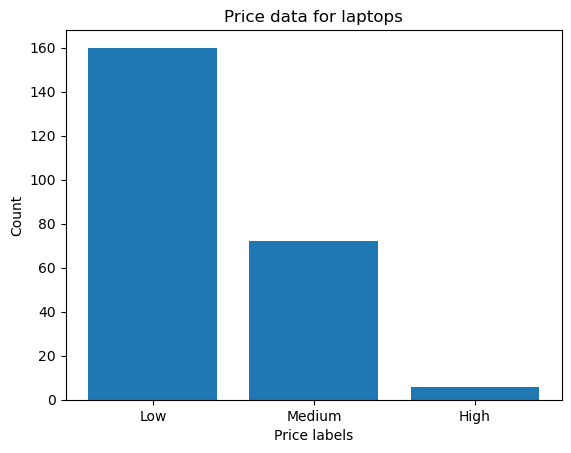

In [50]:
plt.bar(labels,df['Price_Label'].value_counts())
plt.xlabel('Price labels')
plt.ylabel('Count')
plt.title('Price data for laptops')

In [51]:
dummy=pd.get_dummies(df,columns=['Screen'])
dummy.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inches,Weight_pounds,Price_Label,Screen_Full HD,Screen_IPS Panel
0,Acer,4,2,1,5,0.235294,8,256,978,14.0,0.725624,Low,False,True
1,Dell,3,1,1,3,0.470588,4,256,634,15.6,0.997732,Low,True,False
2,Dell,3,1,1,7,0.882353,8,256,946,15.6,0.997732,Low,True,False
3,Dell,4,2,1,5,0.235294,8,128,1244,13.3,0.553288,Low,False,True
4,HP,4,2,1,7,0.352941,8,256,837,15.6,0.866213,Low,True,False


In [52]:
df=dummy
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inches,Weight_pounds,Price_Label,Screen_Full HD,Screen_IPS Panel
0,Acer,4,2,1,5,0.235294,8,256,978,14.0,0.725624,Low,False,True
1,Dell,3,1,1,3,0.470588,4,256,634,15.6,0.997732,Low,True,False
2,Dell,3,1,1,7,0.882353,8,256,946,15.6,0.997732,Low,True,False
3,Dell,4,2,1,5,0.235294,8,128,1244,13.3,0.553288,Low,False,True
4,HP,4,2,1,7,0.352941,8,256,837,15.6,0.866213,Low,True,False


In [53]:
df.to_csv('Laptop_Data.csv',index=False)